In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-talk')

In [2]:
class AdalineGD():
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

In [3]:
df = pd.read_csv('iris.csv', header=None)
y = df.iloc[:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[:100, [0,2]].values

In [4]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

scaler = preprocessing.MinMaxScaler()
X2 = scaler.fit_transform(X)

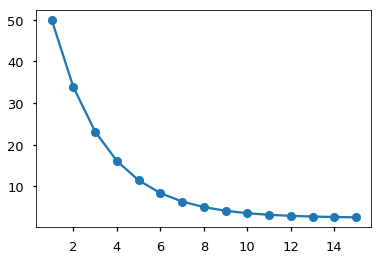

In [8]:
ada = AdalineGD(eta=0.01, n_iter=15).fit(X_scaled, y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')

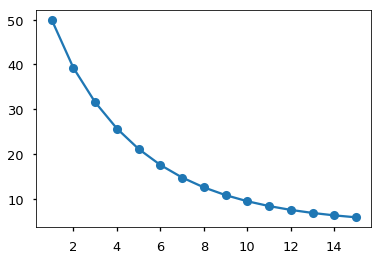

In [9]:
ada = AdalineGD(eta=0.01, n_iter=15).fit(X2, y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')

In [6]:
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:, 1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:5]

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952]])

In [7]:
X_min_max = np.copy(X)
X_min_max[:,0] = (X[:,0] - X[:,0].min()) / (X[:,0].max() - X[:,0].min())
X_min_max[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_min_max[:5]

array([[0.2962963 , 0.09756098],
       [0.22222222, 0.09756098],
       [0.14814815, 0.07317073],
       [0.11111111, 0.12195122],
       [0.25925926, 0.09756098]])